<a href="https://colab.research.google.com/github/intertech-academy/ml-intro/blob/master/2_uzycie_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://intertechacademy.pl/wp-content/uploads/2020/08/machine_learning.png)

# **Zastosowanie pakietu Scikit-learn**

Kolejnym pakietem, który poznamy jest scikit-learn. Zawiera on użyteczne funkcje pozwalające m.in. na:

*   regresję (czyli przewidywanie pewnej liczbowej właściwości np. ceny mieszkania),
*   klasyfikację (np. odróżnienie psa od kota na fotografii),
*   analizę skupień (sprawdzanie czy dane da się pogrupować wg. pewnych kryteriów).

W tym tutorialu zajmiemy się prostym przykładem z tej pierwszej dziedziny i spróbujemy użyć scikit-learn do regresji liniowej.


---



In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Do rysowania wykresów 3D

import sklearn.linear_model

---
## Prosty przykład regresji liniowej

Regresja liniowa polega na dopasowaniu równania liniowego $y=ax+b$ do dostępnych danych. Wyobraźmy sobie przykład, w którym chcemy oszacować cenę samochodu na podstawie mocy jego silnika. W tej sytuacji:

*   $x$ oznacza moc silnika,
*   $y$ oznacza cenę samochodu
*   $a$ i $b$ to parametry modelu, które musimy znaleźć na podstawie dostępnych danych.


### Generacja danych

Wygenerujmy przykładowe dane:

Text(0, 0.5, 'y (cena w tys. PLN)')

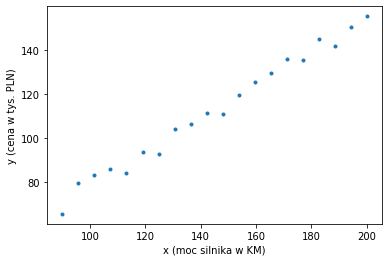

In [12]:
#Liczba dostępnych danych
no_samples = 20

#Wektor wartości x
x = np.linspace(90, 200, no_samples)

#Modelowanie y
y = 0.75*x+4

#Dodajemy do y pewną składową losową
y = y + np.random.randn(no_samples)*5

#Wyświetlamy wyniki
plt.plot(x, y, '.')
plt.xlabel('x (moc silnika w KM)')
plt.ylabel('y (cena w tys. PLN)')

## Dopasowanie danych

Spróbujmy teraz dopasować funkcję liniową do tych danych. Na podstawie wektorów $x$ i $y$ chcemy znaleźć odpowiednie parametry $a$ i $b$, które dobrze dopasują funkcję liniową. Uzyskane wartości powinny być bliskie do $a=0.75$ i $b=4$, których użyliśmy generując dane.

a=0.7684901460429794
b=1.2887018974269893


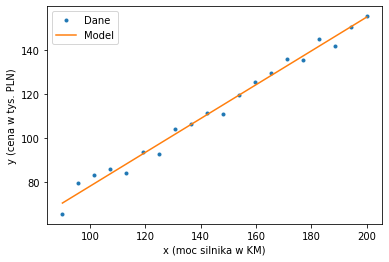

In [20]:
#Tworzymy obiekt dopasowujący model
model = sklearn.linear_model.LinearRegression()

#Dopasowujemy model
model.fit(x.reshape(-1, 1), y)

#Wyświetlmy parametry modelu
print('a='+str(model.coef_[0]))
print('b='+str(model.intercept_))

#Obliczmy dopasowane wartości cen
y_ = model.predict(x.reshape(-1, 1))

#Wyświetlmy wynik
plt.plot(x, y, '.')
plt.plot(x, y_, '-')
plt.xlabel('x (moc silnika w KM)')
plt.ylabel('y (cena w tys. PLN)')
plt.legend(('Dane','Model'))

---
##  Funkcja dwuwymiarowa

W większości sytuacji liczba dostępnych zmiennych jest większa niż jeden. Np. w przypadku ceny samochodu oprócz mocy silnika znaczenie może mieć też jego wiek. W przypadku dwóch funkcji możemy dopasować do danych model:
$y=a_1x_1+a_2x_2+b$.

### Generacja danych


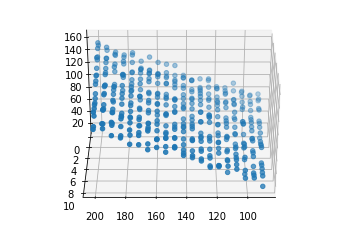

In [36]:
#Liczba dostępnych danych
no_samples = 20

#Wektory wartości x
x_1 = np.linspace(90, 200, no_samples)
x_2 = np.linspace(0, 10, no_samples)

#Siatka wartości
xx_1, xx_2 = np.meshgrid(x_1, x_2)

#Zamiana macierzy dwuwymiarowych na wektory
x_1_vec = xx_1.ravel()
x_2_vec = xx_2.ravel()

#Modelowanie y
y = 0.75*x_1_vec-5*x_2_vec+4

#Dodajemy do y pewną składową losową
y = y + np.random.randn(y.shape[0])*5

#Wyświetlamy wyniki
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1_vec, x_2_vec, y)
ax.azim = 90

---
## Dopasowanie modelu

Za pomocą pakietu scikit-learn możemy bardzo łatwo dopasować model liniowy z dowolną liczbą zmiennych.

a_1=0.7518597399727409
a_2=-4.944062048045174
b=3.0320089903247833


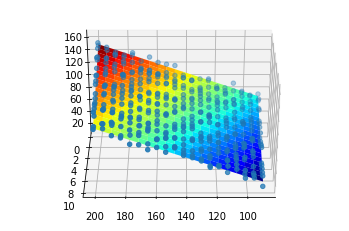

In [43]:
#Tworzymy obiekt dopasowujący model
model = sklearn.linear_model.LinearRegression()

#Tworzenie macierzy z danymi
X = np.column_stack((x_1_vec, x_2_vec))

#Dopasowujemy model
model.fit(X, y)

#Wyświetlmy parametry modelu
print('a_1='+str(model.coef_[0]))
print('a_2='+str(model.coef_[1]))
print('b='+str(model.intercept_))

#Obliczmy dopasowane wartości cen
y_ = model.predict(X)

#Do rysowania transformujemy wektor na macierz 2D:
yy_ = y_.reshape((no_samples, no_samples))

#Wyświetlamy wyniki
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1_vec, x_2_vec, y)
ax.plot_surface(xx_1, xx_2, yy_, linewidth=0, cmap='jet')

ax.azim = 90